In [31]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [23]:
ticker = 'DMLRY'
date = '2019-12-02'

stock_data = pd.DataFrame()

stock_data[ticker] = wb.DataReader(ticker,
                                   data_source = 'yahoo',
                                   start = date)['Adj Close']
stock_data

,DMLRY
Date,
2019-12-02,12.972068
2019-12-03,12.896813
2019-12-04,12.877998
2019-12-05,12.840371
2019-12-06,12.812151
...,...
2020-12-08,17.379999
2020-12-09,17.340000
2020-12-10,17.070000


In [24]:
#Calculate the logrithmic returns
log_dreturn = np.log(1 + stock_data.pct_change())

In [25]:
# Calculate Drift
ret = log_dreturn.mean()
var = log_dreturn.var()
drift = ret - (0.5*var)

In [26]:
# Compute Var. in the Daily return
st_dev_return = log_dreturn.std()
pred_days = 30
simulations = 10000


rand = norm.ppf(np.random.rand(pred_days, simulations))

exp_returns = np.exp(drift.values + st_dev_return.values * rand)

In [27]:
# Visualization 
exp_price = np.zeros_like(exp_returns)
exp_price[0] = stock_data.iloc[-1]

for t in range(1, pred_days):
    exp_price[t] = exp_price[t-1]*exp_returns[t]

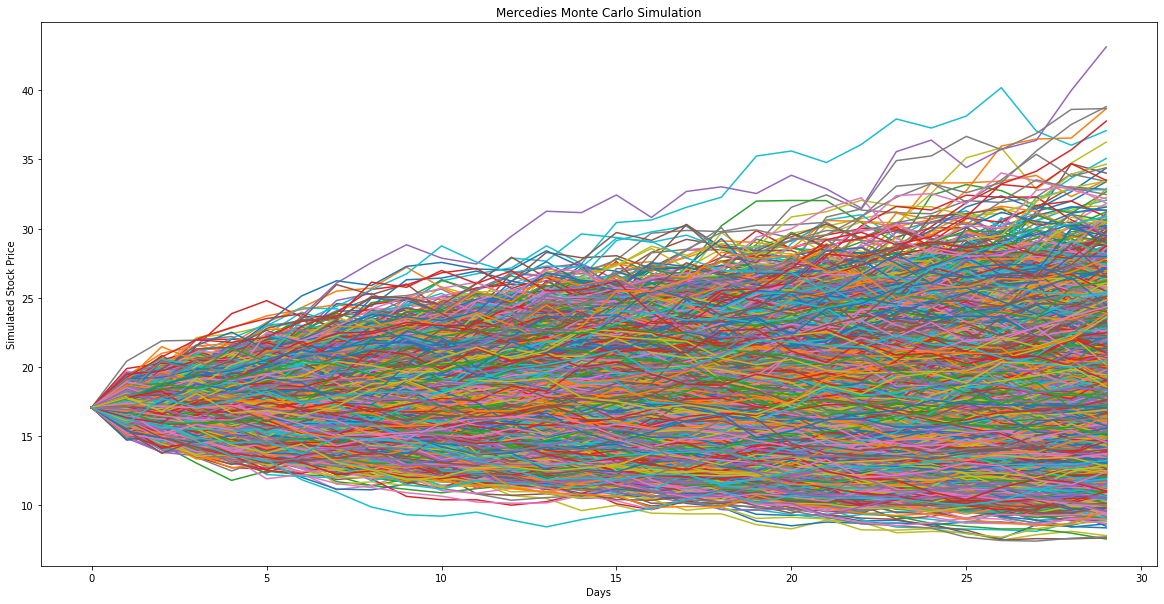

In [30]:
plt.figure(figsize = (20, 10))
plt.plot(pd.DataFrame(exp_price).iloc[:,:])

plt.title("Mercedies Monte Carlo Simulation")
plt.xlabel('Days')
plt.ylabel('Simulated Stock Price')

plt.savefig('output_data/Merc_Sim.png')

 Expected Value: $17.57


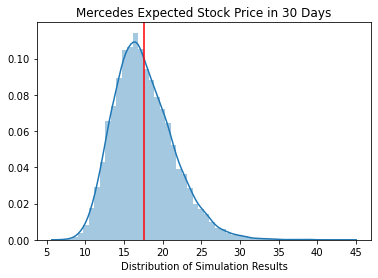

In [29]:
sns.distplot(pd.DataFrame(exp_price).iloc[-1])
mean = (round(pd.DataFrame(exp_price).iloc[-1].mean(),2))

plt.axvline(mean, color = 'r', linestyle = '-')

print(f" Expected Value: ${round(pd.DataFrame(exp_price).iloc[-1].mean(),2)}")


plt.xlabel("Distribution of Simulation Results")
plt.title("Mercedes Expected Stock Price in 30 Days")
plt.savefig('output_data/Merc_Sim_Dist')

The expected price of Mercedes' stock in 30 days based on this model is $17.59.